In [1]:
%matplotlib inline
## Import system modules
# sci computing
import numpy as np
# sklearn importing
from sklearn.ensemble.forest import RandomForestRegressor
# plotting
import matplotlib.pyplot as plt  # for plotting
#import matplotlib as mp

In [2]:
def loadTrainingData(caseName, ReNum):
    trainFeaturesFile = './database/' + caseName + '/markers/' + ReNum + '/markerFile'
    trainResponsesFile = './database/' + caseName + '/deltaFields/' + ReNum + '/deltaField'
    trainFeatures = np.loadtxt(trainFeaturesFile)
    trainResponses = np.loadtxt(trainResponsesFile)
    return trainFeatures, trainResponses

def loadTestData(caseName, ReNum):
    testFeaturesFile = './database/' + caseName + '/markers/' + ReNum + '/markerFile'
    testResponsesFile = './database/' + caseName + '/deltaFields/' + ReNum + '/deltaField'
    testFeatures = np.loadtxt(testFeaturesFile)
    testResponses = np.loadtxt(testResponsesFile)
    return testFeatures, testResponses

In [3]:
def randomForest(trainFeatures, trainResponses, testFeatures, maxFeatures = 'log2', nTree=100):
    ## Settings of random forests regressor
    regModel = RandomForestRegressor(n_estimators=nTree, max_features=maxFeatures)    
    ## Train the random forests regressor
    regModel.fit(trainFeatures, trainResponses)
    ## Prediction
    testResponsesPred = regModel.predict(testFeatures)
    return testResponsesPred

In [4]:
def plotXiEta(XiEta_RANS, testResponses, testResponsesPred):
    # Reconstruct Barycentric coordinates
    XiEta_DNS = XiEta_RANS + testResponses
    XiEta_ML = XiEta_RANS + testResponsesPred
    # Plot Reynolds stress anisotropy in Barycentric triangle
    interval = 1
    pointsNum = int(XiEta_RANS.shape[0])
    plt.figure()
    plt.plot([0,1,0.5,0.5,0],[0,0,3**0.5/2.0,3**0.5/2.0,0],'g-')
    p1, = plt.plot(XiEta_RANS[:pointsNum:interval,0],XiEta_RANS[:pointsNum:interval,1],
                   'bo', markerfacecolor='none', markeredgecolor='b',
                   markeredgewidth=2, markersize=10)
    p2, = plt.plot(XiEta_DNS[:pointsNum:interval,0],XiEta_DNS[:pointsNum:interval,1],
                   'ks', markerfacecolor='none', markeredgecolor='k',
                   markeredgewidth=2, markersize=10)
    p3, = plt.plot(XiEta_ML[:pointsNum:interval,0],XiEta_ML[:pointsNum:interval,1],
                   'r^', markerfacecolor='none', markeredgecolor='r',
                   markeredgewidth=2, markersize=10)
    lg = plt.legend([p1,p2,p3], ['RANS', 'DNS', 'ML'], loc = 0)
    lg.draw_frame(False)
    plt.ylim([0,3**0.5/2.0])
    plt.show()

def iterateLines(dataFolderRANS):
    # Start index of different sample lines
    indexList = [0, 98, 191, 287, 385, 483, 581, 679, 777, 875, 971]
    # Make plots at x=2 and x=4
    for iterN in [3,5]:
        XiEta = np.loadtxt(dataFolderRANS + 'line' + str(iterN) + '_XiEta.xy')
        startIndex = indexList[iterN-1]
        endIndex = indexList[iterN]
        plotXiEta(XiEta, testResponses[startIndex:endIndex,:], 
                         testResponsesPred[startIndex:endIndex,:])
    #plt.show()

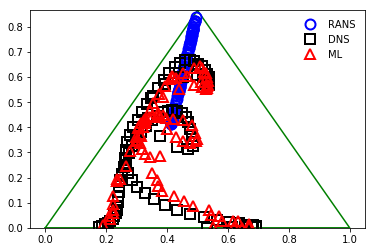

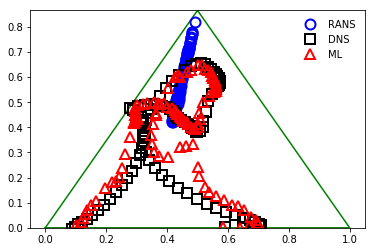

In [5]:
if __name__== "__main__":
    # Load data
    trainFeatures, trainResponses = loadTrainingData('pehill', 'Re5600')
    testFeatures, testResponses = loadTestData('pehill', 'Re10595')
    # Make prediction via the random forest regressor
    testResponsesPred = randomForest(trainFeatures, trainResponses, testFeatures, 6, 100)
    # Make plots of Reynolds stress anisotropy
    dataFolderRANS = './database/pehill/XiEta-RANS/Re10595/'
    iterateLines(dataFolderRANS)